<a href="https://colab.research.google.com/github/faseenafarz/machine-learning/blob/main/redwine_quality_prediction_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/redwine quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [7]:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([5, 4, 6, 6, 6, 5, 5, 4, 6, 6, 7, 5, 6, 5, 6, 6, 4, 6, 7, 5, 5, 6,
       5, 7, 6, 6, 7, 4, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 8, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5,
       7, 6, 7, 5, 6, 5, 6, 6, 7, 5, 7, 5, 6, 6, 5, 7, 5, 6, 7, 6, 5, 6,
       6, 5, 8, 6, 4, 5, 5, 6, 5, 6, 3, 5, 3, 5, 6, 6, 6, 7, 5, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 7,
       6, 7, 5, 5, 4, 6, 6, 7, 7, 7, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 4, 5, 6, 5, 5, 5, 5, 4, 7, 6, 7, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 7, 6, 5, 5, 4, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 5, 6, 6, 5, 5, 4, 7, 7, 8, 5, 5, 6, 7, 6, 6, 5, 6, 5,
       6, 6, 8, 6, 5, 5, 5, 7, 5, 5, 6, 4, 6, 6, 5, 7, 5, 7, 6, 5, 5, 5,
       6, 7, 6, 7, 5, 5, 7, 5, 5, 6, 6, 6, 6, 5, 5, 4, 6, 6, 7, 5, 5, 6,
       5, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 7,
       5, 7, 5, 6, 7, 6, 7, 5, 5, 6, 5, 8, 7, 6, 5,

In [8]:
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score,accuracy_score
mat=confusion_matrix(y_test,y_pred)
print(mat)

[[  0   0   1   0   0   0]
 [  0   1   6  10   0   0]
 [  2  13 129  44   7   0]
 [  0   7  38 123  31   1]
 [  0   0   2  27  27   5]
 [  0   0   1   2   2   1]]


In [9]:
print('accuracy score',accuracy_score(y_test,y_pred))

accuracy score 0.5854166666666667


In [10]:
print('mean absolute error',mean_absolute_error(y_test,y_pred))
print('mean absolute percentage error',mean_absolute_percentage_error(y_test,y_pred))
print('mean squared error',mean_squared_error(y_test,y_pred))
print('r2 score',r2_score(y_test,y_pred))

mean absolute error 0.48541666666666666
mean absolute percentage error 0.08875248015873015
mean squared error 0.63125
r2 score 0.0043743453884542705


[Text(0.5506134169078362, 0.9736842105263158, 'alcohol <= 0.327\nentropy = 1.71\nsamples = 1119\nvalue = [9, 36, 486, 438, 138, 12]'),
 Text(0.3752974037177204, 0.9210526315789473, 'total sulfur dioxide <= 0.327\nentropy = 1.398\nsamples = 692\nvalue = [6, 25, 415, 219, 25, 2]'),
 Text(0.21542116540516473, 0.868421052631579, 'sulphates <= 0.126\nentropy = 1.469\nsamples = 602\nvalue = [6, 24, 331, 215, 24, 2]'),
 Text(0.0882680320569902, 0.8157894736842105, 'citric acid <= 0.055\nentropy = 1.358\nsamples = 234\nvalue = [4, 18, 156, 52, 4, 0]'),
 Text(0.02315227070347284, 0.7631578947368421, 'sulphates <= 0.083\nentropy = 1.601\nsamples = 65\nvalue = [3, 7, 42, 9, 4, 0]'),
 Text(0.007123775601068566, 0.7105263157894737, 'residual sugar <= 0.027\nentropy = 1.078\nsamples = 25\nvalue = [0, 7, 17, 0, 1, 0]'),
 Text(0.003561887800534283, 0.6578947368421053, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.01068566340160285, 0.6578947368421053, 'plt.phase_spectrum <= 0.421\

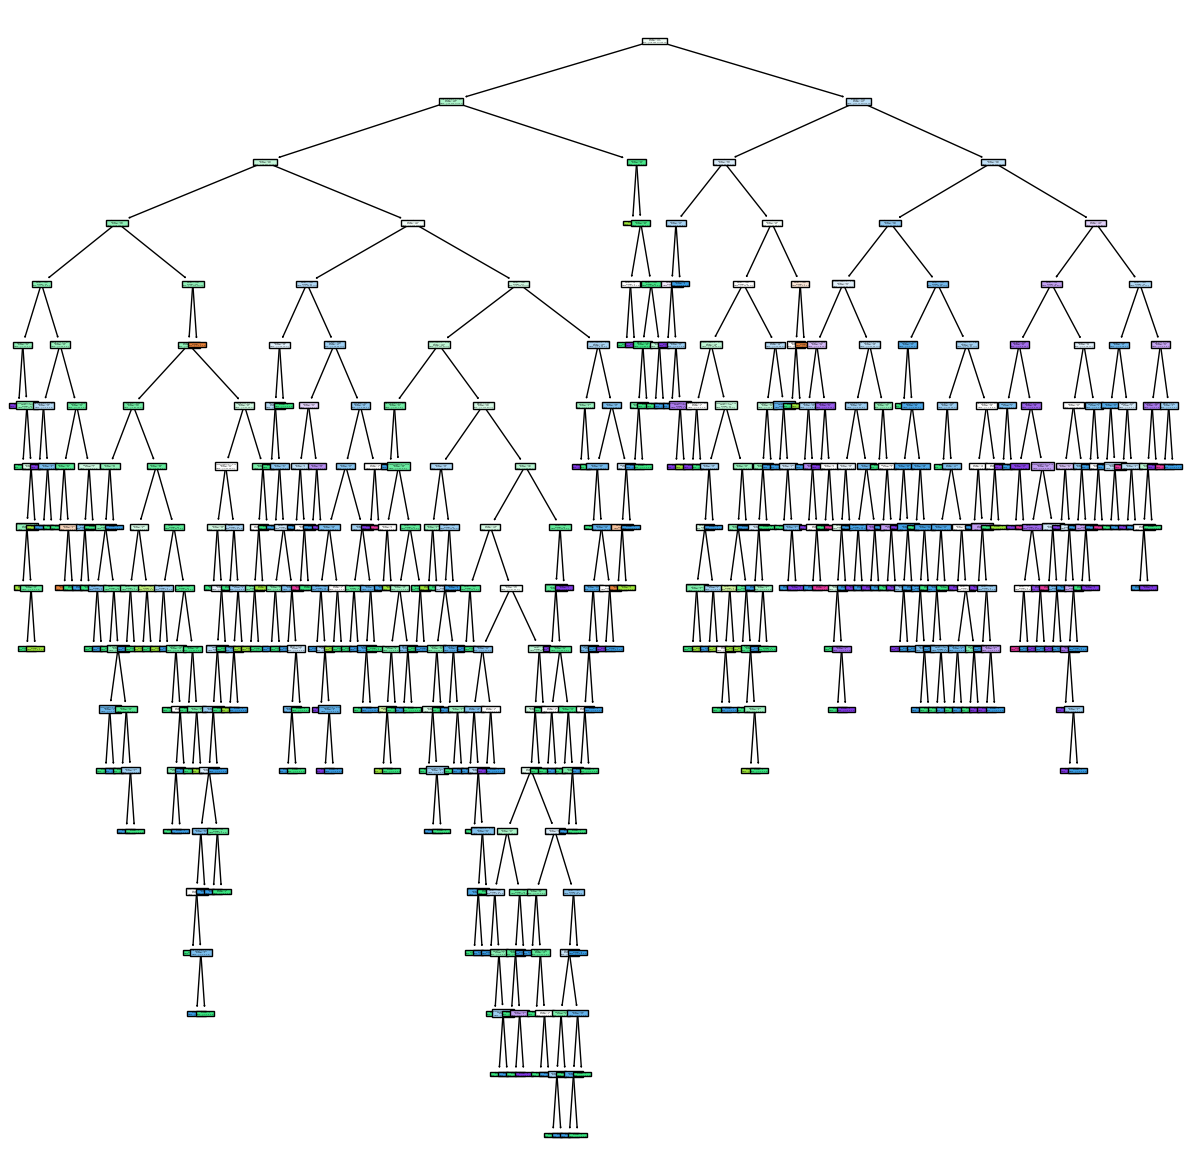

In [11]:
# this attribute for decision tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','plt.phase_spectrum','sulphates','alcohol'],filled=True)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators= 10, criterion="entropy")
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 7, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 7, 5, 5, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 5, 7, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 7, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 5, 7, 5, 7, 6, 5, 4, 6,
       6, 7, 5, 5, 5, 5, 7, 5, 5, 4, 6, 7, 8, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       5, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 7, 6, 7, 5, 6, 6, 5, 7,
       5, 5, 5, 6, 6, 6, 8, 5, 5, 6, 5, 7, 6, 6, 5,

In [13]:
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score,accuracy_score
mat=confusion_matrix(y_test,y_pred1)
print(mat)

[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   2 152  38   3   0]
 [  0   1  65 122  11   1]
 [  0   0   3  25  32   1]
 [  0   0   0   3   3   0]]


In [14]:
print('Accuracy score',accuracy_score(y_test,y_pred1))
print('mean absolute error',mean_absolute_error(y_test,y_pred1))
print('mean absolute percentage error',mean_absolute_percentage_error(y_test,y_pred1))
print('r2 score',r2_score(y_test,y_pred1))

Accuracy score 0.6375
mean absolute error 0.4
mean absolute percentage error 0.07218005952380953
r2 score 0.25081633910418333
